In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import math
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def download_csv(url, destination):
    response = requests.get(url)
    with open(destination, 'wb') as file:
        file.write(response.content)

csv_url = 'https://www150.statcan.gc.ca/t1/tbl1/en/dtl!downloadDbLoadingData-nonTraduit.action?pid=2010002401&latestN=0&startDate=20170101&endDate=20231001&csvLocale=en&selectedMembers=%5B%5B1%5D%2C%5B%5D%2C%5B1%5D%2C%5B1%5D%5D&checkedLevels=1D1%2C1D2'
destination_path = 'data_file.csv'

download_csv(csv_url, destination_path)

In [3]:
df = pd.read_csv(destination_path, encoding='utf-8')
df.head(5)

,REF_DATE,GEO,DGUID,Fuel type,Vehicle type,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017-01,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,425043,NaN,NaN,NaN,0
1,2017-04,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,611018,NaN,NaN,NaN,0
2,2017-07,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,552329,NaN,NaN,NaN,0
3,2017-10,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,450846,NaN,NaN,NaN,0
4,2018-01,Canada,2016A000011124,All fuel types,"Total, vehicle type",Number of vehicles,Units,300,units,0,v1271719067,1.1.1.1,406120,NaN,NaN,NaN,0


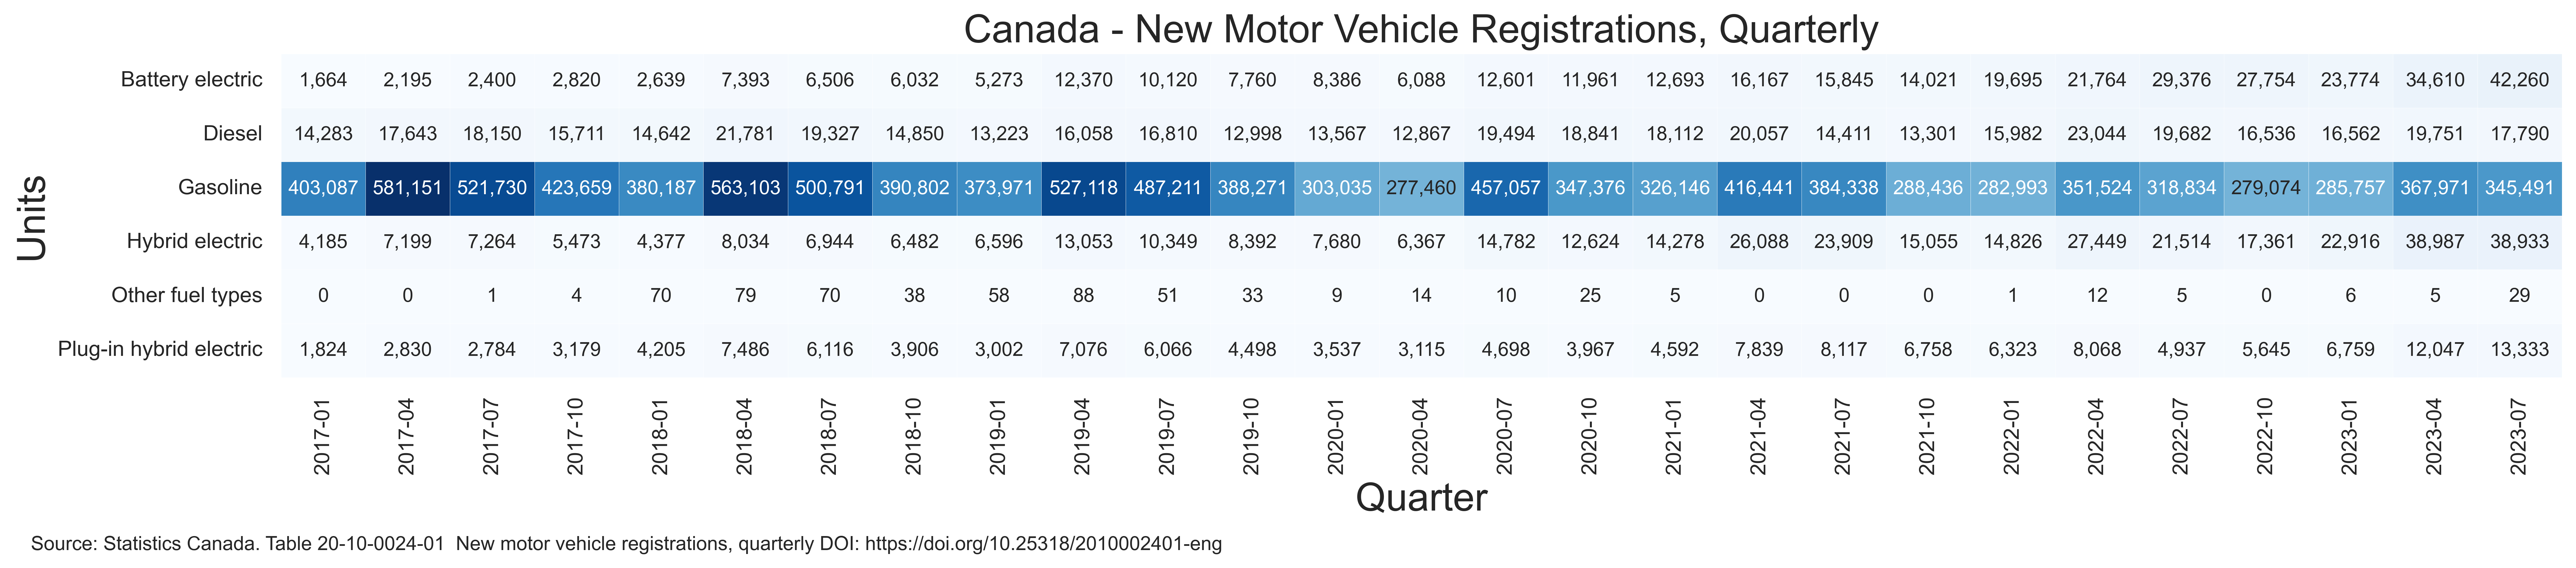

In [4]:
final_df = df[['REF_DATE','Fuel type','VALUE']]
final_df = final_df[final_df['Fuel type'] != 'All fuel types']
final_df = final_df.groupby(['Fuel type','REF_DATE']).sum()
final_df = final_df.reset_index()

DATA_DF2 = final_df.pivot(index='Fuel type', columns='REF_DATE', values='VALUE')

sns.set(style="whitegrid", font_scale=1)

fig, ax = plt.subplots(1, 1, figsize = (21, 3), dpi=500,frameon =True)
sns.heatmap(DATA_DF2,annot=True,cbar=False,linewidths=0.1,annot_kws={"size": 10},fmt=',', square=False,cmap="Blues") 

plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

ax.set_ylabel('Units', fontsize=20)    
ax.set_xlabel('Quarter', fontsize=20)
ax.set_title('Canada - New Motor Vehicle Registrations, Quarterly', fontsize=20)

# Adding a footnote below the x-axis
footnote_text = "Source: Statistics Canada. Table 20-10-0024-01  New motor vehicle registrations, quarterly DOI: https://doi.org/10.25318/2010002401-eng"
plt.figtext(0.04, -0.3, footnote_text, ha="left", fontsize=10, bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))    

fig.savefig('graph3.png',transparent=True,  bbox_inches='tight',pad_inches=0.15,dpi=400)